In [56]:
#Importing required modules
from scipy.spatial.distance import euclidean
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from operator import itemgetter
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import math

Import the dataset

In [2]:
pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/data_pickle/all_sentences_pca.pkl')
#pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/data_pickle/Episode_1_pca.pkl')

# To do a matrix : pca_df = pca_df.values attention select the pca row before
print(pca_df.shape)

(92374, 22)


In [ ]:
def cluster(data, k ):
       
    wcss = []
    
    for i in range(1, k):
        #kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=100, n_init=50)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10,5))
    plt.plot(range(1,30), wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.savefig('elbowcurve.png')
    plt.show()
    
cluster(pca_df.loc[:,'PCA1':'PCA2'], 30)

Plot PCA1 vs PCA2

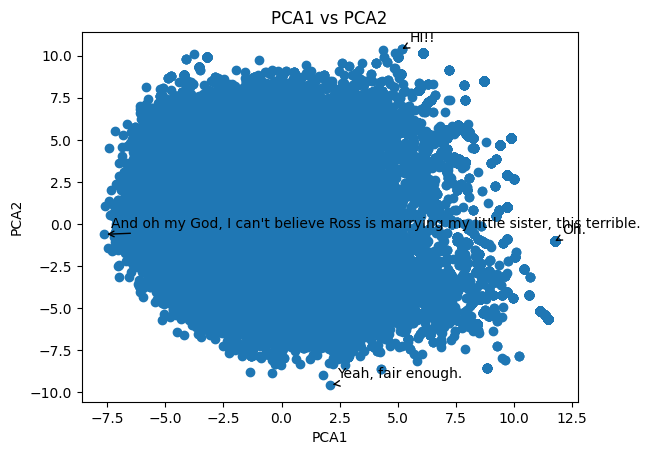

In [3]:
# Plotting PCA1 and PCA2

plt.scatter(pca_df['PCA1'], pca_df['PCA2'])

# Finding the index of the furthest words on each axis
max_pca1_index = pca_df['PCA1'].idxmax()
max_pca2_index = pca_df['PCA2'].idxmax()

min_pca1_index = pca_df['PCA1'].idxmin()
min_pca2_index = pca_df['PCA2'].idxmin()

# Getting the corresponding words
max_pca1_word = pca_df['Said'][max_pca1_index]
max_pca2_word = pca_df['Said'][max_pca2_index]

min_pca1_word = pca_df['Said'][min_pca1_index]
min_pca2_word = pca_df['Said'][min_pca2_index]

# Annotating the furthest words on each axis
plt.annotate(max_pca1_word, (pca_df['PCA1'][max_pca1_index], pca_df['PCA2'][max_pca1_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(max_pca2_word, (pca_df['PCA1'][max_pca2_index], pca_df['PCA2'][max_pca2_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca1_word, (pca_df['PCA1'][min_pca1_index], pca_df['PCA2'][min_pca1_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca2_word, (pca_df['PCA1'][min_pca2_index], pca_df['PCA2'][min_pca2_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))



# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA1 vs PCA2')

# Displaying the plot
plt.show()


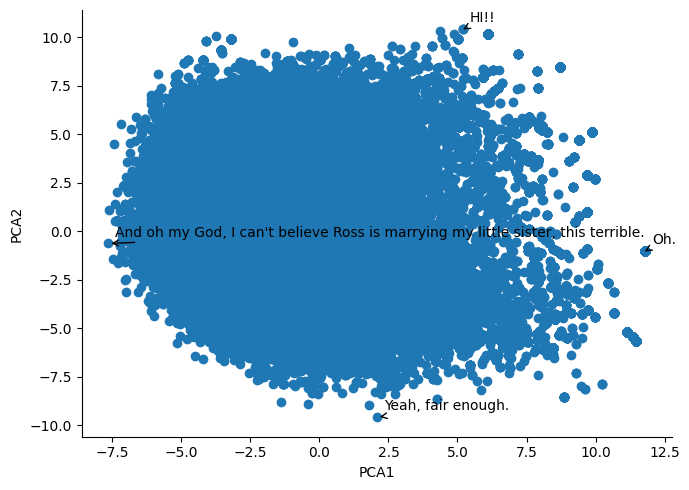

In [28]:


# Finding the index of the furthest words on each axis
max_pca1_index = pca_df['PCA1'].idxmax()
max_pca2_index = pca_df['PCA2'].idxmax()

min_pca1_index = pca_df['PCA1'].idxmin()
min_pca2_index = pca_df['PCA2'].idxmin()

# Getting the corresponding words
max_pca1_word = pca_df['Said'][max_pca1_index]
max_pca2_word = pca_df['Said'][max_pca2_index]

min_pca1_word = pca_df['Said'][min_pca1_index]
min_pca2_word = pca_df['Said'][min_pca2_index]

fig, ax = plt.subplots()
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])

# Annotating the furthest words on each axis
plt.annotate(max_pca1_word, (pca_df['PCA1'][max_pca1_index], pca_df['PCA2'][max_pca1_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(max_pca2_word, (pca_df['PCA1'][max_pca2_index], pca_df['PCA2'][max_pca2_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca1_word, (pca_df['PCA1'][min_pca1_index], pca_df['PCA2'][min_pca1_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca2_word, (pca_df['PCA1'][min_pca2_index], pca_df['PCA2'][min_pca2_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))


# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('PCA1vsPCA2.png')

# Displaying the plot
plt.show()




Smallest et largest values from a PCA

In [29]:
x= pca_df.nsmallest(2000,'PCA20')
print('nSmaller')
print(x['Said'])
print()
x=pca_df.nlargest(2000,'PCA20')
print('nlargest')
print(x['Said'])

nSmaller
60099                           It's totally fine.
67272                         It's not bad at all.
40515    Except for Christmasand their birthdays.
32891                 Every thing's--they're fine.
62186               There's nothing wrong with it.
                           ...                    
81645                                          No.
81916                                          No.
81938                                          No.
82050                                          No.
82313                                          No.
Name: Said, Length: 2000, dtype: object

nlargest
14162                           Is he here?
14163                           Is he here?
32050                           Is he here?
77032                           Is he here?
72561    You don't think he's here, do you?
                        ...                
4749                         You know what?
7141                         You know what?
7388                        

Creation of 20 clusters

In [33]:
num_clusters = 10

X = pca_df.loc[:,'PCA1':'PCA2'] #select all the PCA

#Initialize the class object

kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=50)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
# adding a cluster column to the dataset
pca_df['Cluster']= label

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)


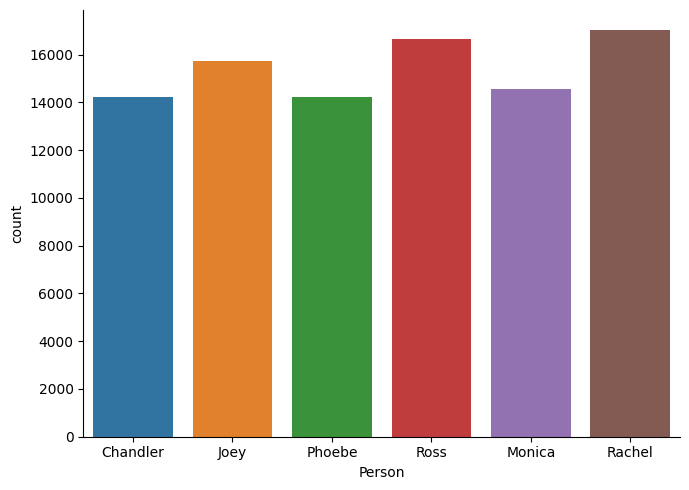

In [32]:
sns.countplot(x='Person', data=pca_df)
plt.savefig('charactercount.png')
plt.show()

Here a create a list in order to get the closest point to each cluster center

In [108]:
from scipy.spatial.distance import euclidean
import random
df2= X.values
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    
    # Testing:    
    #print('closest point to cluster center: ', cluster_pts[min_idx])
    #print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    #print('  ', df2[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])
    print('cluster:', iclust)
    print(pca_df['Person'][cluster_pts_indices[min_idx]],':',pca_df['Said'][cluster_pts_indices[min_idx]])
    print('Random phrases in the cluster:')
    for i in np.arange(10):
        print(pca_df['Said'][cluster_pts_indices[random.randint(cluster_pts_indices[0],len(cluster_pts_indices))]])
    

cluster: 0
Monica : Yep!
Random phrases in the cluster:
Ooh!
Hey!
Yeah!
Oh hi!
Hey!
Hey!
No!
Hi.
Excellent!
Yeah!
cluster: 1
Monica : That's-that's what I said!
Random phrases in the cluster:
What?!
Yes, yes eight.
Hey Rach, can I talk to you outside for a second?
Thanks.
Honey.
She?
I'm just easing you in.
Mr.
How much?
Get outta here.
cluster: 2
Monica : How you holding up?
Random phrases in the cluster:
Gooooood luck with it.
Mine aren't tinted.
No-no, Kathy.
I'm gonna take off...
I..., a jingle?
This headhunter called me.
You used the Europe story!
THE END
Little
Look all you want, it's happening!
cluster: 3
Phoebe : You're getting a massage!
Random phrases in the cluster:
I hit her in the eye!
Joey!
It's so good that you had a good time in Greece!
Oh my God, this is a police badge!
We can't watch that!
I'm Gary's partner!
I call their apartment!!
Thanks to a little something called "Helvetica Bold 24 point"!
Cha-ching!
Phoebe!
cluster: 4
Chandler : Uhh.
Random phrases in the clust

Plot of all the clusters with their centers and the corresponding sentences.

<IPython.core.display.Javascript object>


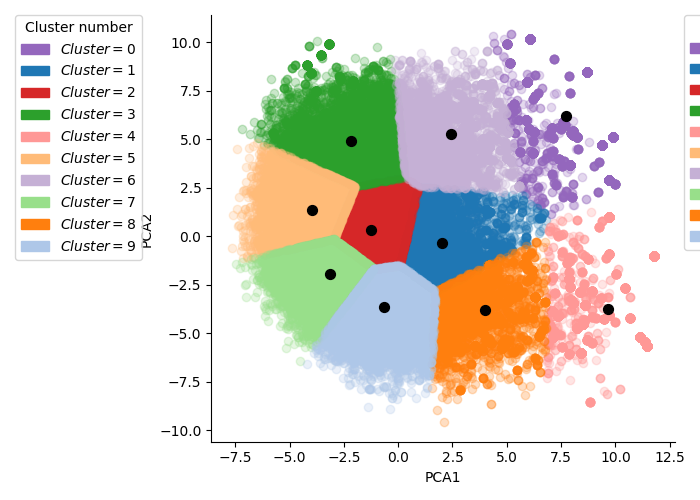


cluster: 0
Random phrases in the cluster:
Phoebe : Hey!
Phoebe : Oh!
Monica : Ooooh!
Ross : Oh, great!
Ross : Hi.
Chandler : Fine!
Monica : Yes!
Phoebe : AH!
Joey : Sure!
Joey : Hey!

cluster: 1
Random phrases in the cluster:
Joey : What is that?
Chandler : We'll make a list.
Rachel : Ah, oh God.
Ross : Mr
Rachel : Oh, umm, I was just y'know working out and umm Oh, that's it.
Rachel : Yeah!!!
Phoebe : Just over
Joey : Ready?
Ross : What?!
Monica : Oh, I have been begging you for months and you did!

cluster: 2
Random phrases in the cluster:
Joey : Who's seven?
Rachel : What bra?
Monica : Dad, dad.
Rachel : It was really fun being married to you tonight.
Ross : Hi Whitney.
Rachel : Y'know, I want a man!!
Chandler : Y'know you're never know what's gonna end up happening, you go out for a couple of beers and end up on a fishing boat to Nova Scotia!
Joey : All right, so we should go catch our movie.
Monica : We have waited so long for this.
Rachel : Hey how's it, how's it going with you 

In [109]:
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]

colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))


df2 = X.values

fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text[key]))
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster = {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

ax.legend(title='Cluster number',bbox_to_anchor= (-0.15,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('clusterprediction.png',bbox_inches='tight')
plt.show()


import random
df2= X.values
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])

    closest_pt_idx.append(cluster_pts_indices[min_idx])
    print('')
    print('cluster:', iclust)
    print('Random phrases in the cluster:')
    for i in np.arange(10):
        ind = random.randint(cluster_pts_indices[0],len(cluster_pts_indices))
        print(pca_df['Person'][cluster_pts_indices[ind]],':',pca_df['Said'][cluster_pts_indices[ind]])
        



Plot for each characters the percentage of each cluster. 
Side note: if the code run on 1 episode, characters can get is 0% belonging on some clusters

In [40]:
def make_order(num_clusters,percentage):
    array=np.zeros((num_clusters,2))
    
    for i in np.arange(num_clusters):
        array[i][0]=i
    for i in percentage.index:
        array[i][1]=percentage.loc[i]
    return array

<ipython-input-42-b738c90a6967>:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig('Percentage_allsentences2.png',bbox_inches='tight')


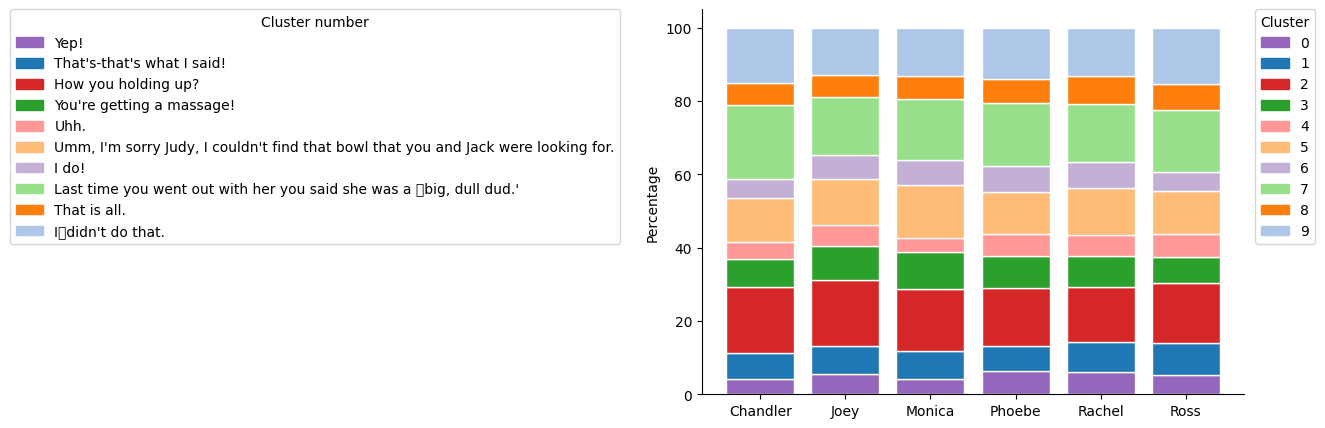

In [42]:
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
name=np.unique(pca_df['Person'])
r= np.arange(len(name))

colors = sns.color_palette('tab20', num_clusters)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

fig = plt.figure()
ax = fig.add_subplot()

for i in name:
    character =pca_df[pca_df['Person'].str.contains(i)]
    percent = character['Cluster'].value_counts(normalize=True) * 100 
    percentage = make_order(num_clusters,percent)
    x = np.zeros(num_clusters)
    b=0
    for cluster_val in np.arange(num_clusters):
        x[cluster_val]=percentage[cluster_val][1]
        plt.bar(i,x[cluster_val],bottom=b, edgecolor='white', color=ind_col_map[cluster_val], label=f'$Cluster = {cluster_val}$')
        b += x[cluster_val]
        


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))
    
first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)
  
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key], label=text[key]))



    # display the graph.
ax.legend(title='Cluster number',bbox_to_anchor= (-0.15,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)
plt.ylabel('Percentage')
plt.savefig('Percentage_allsentences2.png',bbox_inches='tight')
plt.show()




<IPython.core.display.Javascript object>


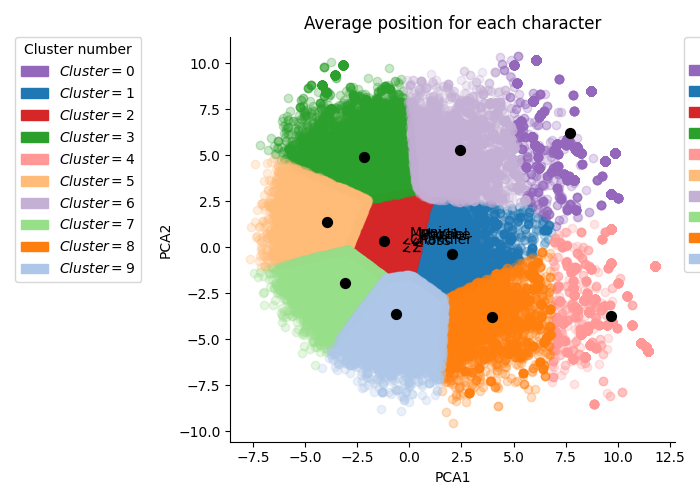

In [48]:
%matplotlib notebook

ross =pca_df[pca_df['Person'].str.contains('Ross')]
ross_mean_pca1_index = ross['PCA1'].mean()
ross_mean_pca2_index = ross['PCA2'].mean()

monica =pca_df[pca_df['Person'].str.contains('Monica')]
monica_mean_pca1_index = monica['PCA1'].mean()
monica_mean_pca2_index = monica['PCA2'].mean()

chandler =pca_df[pca_df['Person'].str.contains('Chandler')]
chandler_mean_pca1_index = chandler['PCA1'].mean()
chandler_mean_pca2_index = chandler['PCA2'].mean()

phoebe =pca_df[pca_df['Person'].str.contains('Phoebe')]
phoebe_mean_pca1_index = phoebe['PCA1'].mean()
phoebe_mean_pca2_index = phoebe['PCA2'].mean()

rachel =pca_df[pca_df['Person'].str.contains('Rachel')]
rachel_mean_pca1_index = rachel['PCA1'].mean()
rachel_mean_pca2_index = rachel['PCA2'].mean()

joey =pca_df[pca_df['Person'].str.contains('Joey')]
joey_mean_pca1_index = joey['PCA1'].mean()
joey_mean_pca2_index = joey['PCA2'].mean()

text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))


df2 = X.values

fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text[key]))
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster = {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

ax.legend(title='Cluster number',bbox_to_anchor= (-0.2,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)







# Plotting PCA1 and PCA2



# Mean for PCA1

plt.annotate('Ross', (ross_mean_pca1_index,ross_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Monica', (monica_mean_pca1_index, monica_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Chandler', (chandler_mean_pca1_index, chandler_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Phoebe', (phoebe_mean_pca1_index ,phoebe_mean_pca2_index ), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Rachel', (rachel_mean_pca1_index,rachel_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Joey', (joey_mean_pca1_index, joey_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))


# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Average position for each character')
plt.savefig('average position.png',bbox_inches='tight')

# Displaying the plot
plt.show()

<IPython.core.display.Javascript object>


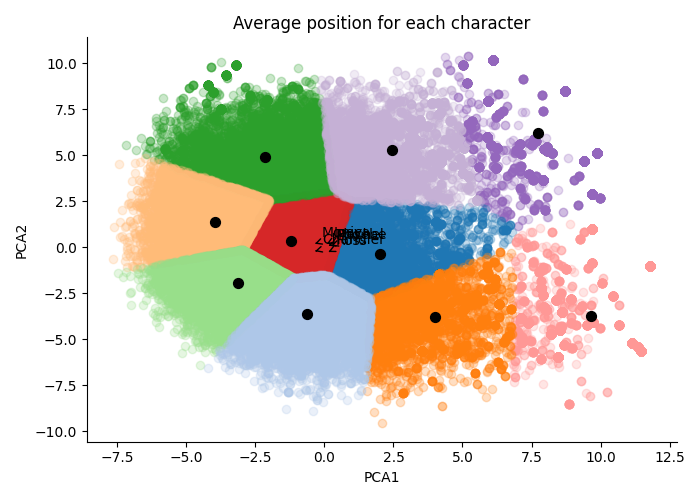

In [51]:


ross =pca_df[pca_df['Person'].str.contains('Ross')]
ross_mean_pca1_index = ross['PCA1'].mean()
ross_mean_pca2_index = ross['PCA2'].mean()

monica =pca_df[pca_df['Person'].str.contains('Monica')]
monica_mean_pca1_index = monica['PCA1'].mean()
monica_mean_pca2_index = monica['PCA2'].mean()

chandler =pca_df[pca_df['Person'].str.contains('Chandler')]
chandler_mean_pca1_index = chandler['PCA1'].mean()
chandler_mean_pca2_index = chandler['PCA2'].mean()

phoebe =pca_df[pca_df['Person'].str.contains('Phoebe')]
phoebe_mean_pca1_index = phoebe['PCA1'].mean()
phoebe_mean_pca2_index = phoebe['PCA2'].mean()

rachel =pca_df[pca_df['Person'].str.contains('Rachel')]
rachel_mean_pca1_index = rachel['PCA1'].mean()
rachel_mean_pca2_index = rachel['PCA2'].mean()

joey =pca_df[pca_df['Person'].str.contains('Joey')]
joey_mean_pca1_index = joey['PCA1'].mean()
joey_mean_pca2_index = joey['PCA2'].mean()

text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))


df2 = X.values

fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')





# Plotting PCA1 and PCA2



# Mean for PCA1

plt.annotate('Ross', (ross_mean_pca1_index,ross_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Monica', (monica_mean_pca1_index, monica_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Chandler', (chandler_mean_pca1_index, chandler_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Phoebe', (phoebe_mean_pca1_index ,phoebe_mean_pca2_index ), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Rachel', (rachel_mean_pca1_index,rachel_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Joey', (joey_mean_pca1_index, joey_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))


# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Average position for each character')
plt.savefig('average position3.png',bbox_inches='tight')

# Displaying the plot
plt.show()

In [46]:
plt.savefig('zoomed_plot.png', dpi=300)  # Adjust the filename and dpi as needed


C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)


## Convex Hull plot
### For each clusters

<IPython.core.display.Javascript object>


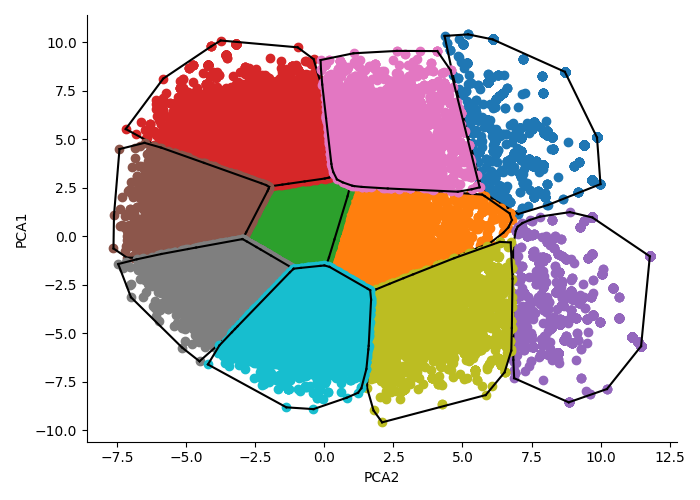

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

data = X.values

# Assume you have already clustered your data and have labels for each point
labels = label
# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Iterate over unique labels to plot convex hulls for each cluster
for i in u_labels:
    # Get the points belonging to the current cluster
    #cluster_points = data[labels == label]
    cluster_points = pca_df.loc[pca_df['Cluster'] == i,['PCA1','PCA2']]
    cluster_points =  cluster_points.values

    # Compute the convex hull for the current cluster
    hull = ConvexHull(cluster_points)

    # Plot the convex hull
    ax.plot(cluster_points[:, 0], cluster_points[:, 1], 'o')
    for simplex in hull.simplices:
        ax.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], 'k-')

# Set labels and show the plot
ax.set_xlabel('PCA2')
ax.set_ylabel('PCA1')
plt.show()


### For the 50% first points of each cluster

In order to achieve that we list all the points for each cluster, then we look for the distance for each points to the center of the cluster. Them we need to check if there is at least 3 differents points. Indeed some cluster can have several points that are the same due to the same embeddings. 
If there is at least 3 differents points we plot the convex hull, al we only plot the points.

In [82]:
def distance(p1,p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
p1=[1.4232059, -2.3466244 ]
p2=[7.737036, 6.2051234]
distance(p1,p2)

10.629997223257908

In [81]:
data = X.values
print(data)
print(centroids)
print(centroids[0])
distances = kmeans.transform(X)
print(distances)



[[ 1.4232059  -2.3466244 ]
 [-1.9346355  -2.9342299 ]
 [ 4.9343405  -5.5252533 ]
 ...
 [-2.8078654   0.35829777]
 [ 2.3039503  -4.435538  ]
 [ 0.28045207  0.05861286]]
[[ 7.737036    6.2051234 ]
 [ 2.0223696  -0.34976068]
 [-1.2270437   0.34619132]
 [-2.1611202   4.913689  ]
 [ 9.662083   -3.7666364 ]
 [-3.9697402   1.347876  ]
 [ 2.442838    5.2893476 ]
 [-3.117389   -1.9286432 ]
 [ 3.9870136  -3.7891521 ]
 [-0.6357829  -3.6175938 ]]
[7.737036  6.2051234]
[[10.629997   2.084817   3.7782376 ...  4.5597925  2.9417677  2.419669 ]
 [13.306728   4.7262425  3.3558679 ...  1.5524529  5.9830446  1.4676527]
 [12.060549   5.938459   8.510964  ...  8.8185005  1.977745   5.8877363]
 ...
 [12.057377   4.881856   1.580868  ...  2.307792   7.9606357  4.5305247]
 [11.947473   4.0954685  5.9441442 ...  5.9728923  1.8029189  3.0514035]
 [ 9.663345   1.7891467  1.5346808 ...  3.9363067  5.3426485  3.7886648]]


In [85]:
def checkArray(points):
    count=0
    for i in range(len(points)-1):
        if points[i][0] != points[i+1][0] and points[i][1] != points[i+1][1]:
            count +=1
    if count >=3:
        return True
    else:
        return False

def distance(p1,p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def PlotHull(X, nb_cluster):
    data = X.values
    distances = kmeans.transform(X) # Transform X to a cluster-distance space. In the new space, each dimension is the distance to the cluster centers.
 #same as the euclidean distance between the point and the center of the cluster
    cluster_points = pca_df.loc[pca_df['Cluster'] == nb_cluster]
    
    # Creation of list with the index of the point and the corresponding distance to the center of the cluster
    distance_list=[]
    for j in cluster_points.index:
        print(j)
        distance_temporaire = distances[j,nb_cluster]
        temp = [j,distance_temporaire]
        distance_list.append(temp)
    print('')
    distance_list2=[]
    for j in cluster_points.index:
        distance_temporaire = distances[j,nb_cluster]
        temp = [j,distance_temporaire]
        distance_list.append(temp)
    print(distance2)
    # Then we sort the list by decreasing order of the distance to the cluster center.     
    sort_list = sorted(distance_list, key=itemgetter(1))
    # We want only 50 percents of point of that list:
    num50 = int(len(cluster_points[0:])/2)
    final_list=sort_list[:num50]
    # Get the actual data points using the indices
    closest_points_index = [l[0] for l in final_list]
    closest_points = [pca_df.loc[c][0:2] for c in closest_points_index]
    
    points=np.zeros((len(closest_points),2))
    for p in np.arange(len(closest_points)):
        points[p][0]= closest_points[p][0]
        points[p][1]=closest_points[p][1]
    
    # Compute the convex hull for the current cluster
    if checkArray(points) == True:
        print('cluster:',nb_cluster)
        hull = ConvexHull(points)
        #plot all point
        rest_list=sort_list[num50:]
        rest_point_index=[l[0] for l in rest_list]
        rest_points = [pca_df.loc[c][0:2] for c in rest_point_index]
        rest=np.zeros((len(rest_points),2))
        for i in np.arange(len(rest_points)):
            rest[i][0]= rest_points[i][0]
            rest[i][1]=rest_points[i][1]


        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

        for ax in (ax1, ax2):
            ax.plot(points[:, 0], points[:, 1], '.', color='midnightblue')
            ax.scatter(rest[:, 0], rest[:, 1],c='royalblue', alpha=0.25)
        if ax == ax1:
            ax.set_title('Given points')
        else:
            ax.set_title('Convex hull')
            for simplex in hull.simplices:
                ax.plot(points[simplex, 0], points[simplex, 1], 'c')
                ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='b', color='none', lw=1, markersize=10)
    else: # all the points are the same
        print('cluster:',nb_cluster)
        fig = plt.figure()
        plt.plot(points[:, 0], points[:, 1], '.', color='midnightblue')
        # Set labels and show the plot
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        plt.show()
        print(cluster_points['Said'])

    plt.show()


In [105]:
# This fonction will check if we have at least three different points
def checkArray(points):
    count=0
    for i in range(len(points)-1):
        if points[i][0] != points[i+1][0] and points[i][1] != points[i+1][1]:
            count +=1
    if count >=3:
        return True
    else:
        return False

def distance(p1,p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# This is a function to plot the hull for the 50% of the first points 
def PlotHull(X, nb_cluster):
    data = X.values
    distances = kmeans.transform(X)

    cluster_points = pca_df.loc[pca_df['Cluster'] == nb_cluster]
    
    # Creation of list with the index of the point and the corresponding distance to the center of the cluster
    distance_list=[]
    for j in cluster_points.index:
        distance_temporaire = distances[j,nb_cluster] # give the distance between the point and the center of his cluster
        temp = [j,distance_temporaire] # save the index of the point and the value of the distance
        distance_list.append(temp)
    # Then we sort the list by increasing order of the distance to the cluster center.     
    sort_list = sorted(distance_list, key=itemgetter(1))
    # We want only 50 percents of point of that list:
    num50 = int(len(cluster_points[0:])/2)
    final_list=sort_list[:num50]
    # Get the actual data points using the indices
    closest_points_index = [l[0] for l in final_list]
    closest_points = [pca_df.loc[c][0:2] for c in closest_points_index]
    
    points=np.zeros((len(closest_points),2))
    for p in np.arange(len(closest_points)):
        points[p][0]= closest_points[p][0]
        points[p][1]=closest_points[p][1]
    
    # Compute the convex hull for the current cluster
    if checkArray(points) == True:
        print('cluster:',nb_cluster)
        hull = ConvexHull(points)
        #plot all point
        rest_list=sort_list[num50:]
        rest_point_index=[l[0] for l in rest_list]
        rest_points = [pca_df.loc[c][0:2] for c in rest_point_index]
        rest=np.zeros((len(rest_points),2))
        for i in np.arange(len(rest_points)):
            rest[i][0]= rest_points[i][0]
            rest[i][1]=rest_points[i][1]


        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

        for ax in (ax1, ax2):
            ax.plot(points[:, 0], points[:, 1], '.', color='midnightblue')
            ax.scatter(rest[:, 0], rest[:, 1],c='royalblue', alpha=0.25)
            ax1.set_title('Given points')
            ax1.set_xlabel('PCA1')
            ax1.set_ylabel('PCA2')
        if ax == ax2:
            ax.set_title('Convex hull')
            ax2.set_xlabel('PCA1')
            ax2.set_ylabel('PCA2')
            for simplex in hull.simplices:
                ax.plot(points[simplex, 0], points[simplex, 1], 'c')
                ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='b', color='none', lw=1, markersize=1)
    
    else: # all the points are the same
        print('cluster:',nb_cluster)
        fig = plt.figure()
        plt.plot(points[:, 0], points[:, 1], '.', color='midnightblue')
        # Set labels and show the plot
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        plt.show()
        print(cluster_points['Said'])
    filename = f'convexhull_{nb_cluster}.png'
    plt.savefig(filename)
    plt.show()



cluster: 0


<IPython.core.display.Javascript object>


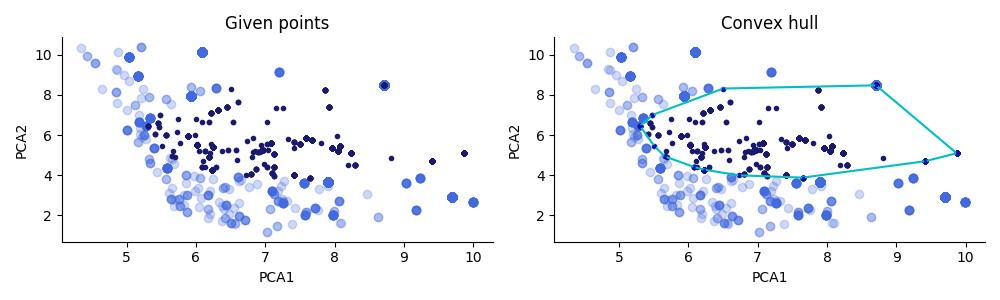

cluster: 1


<IPython.core.display.Javascript object>


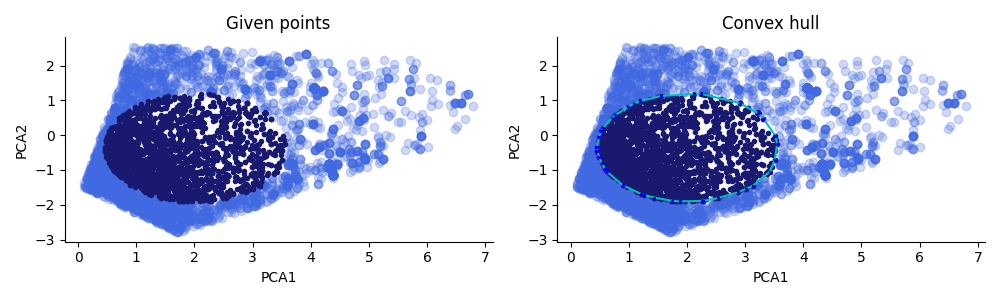

cluster: 2


<IPython.core.display.Javascript object>


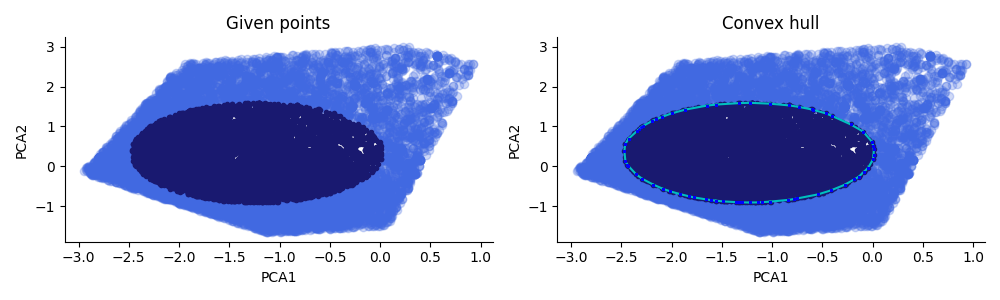

cluster: 3


<IPython.core.display.Javascript object>


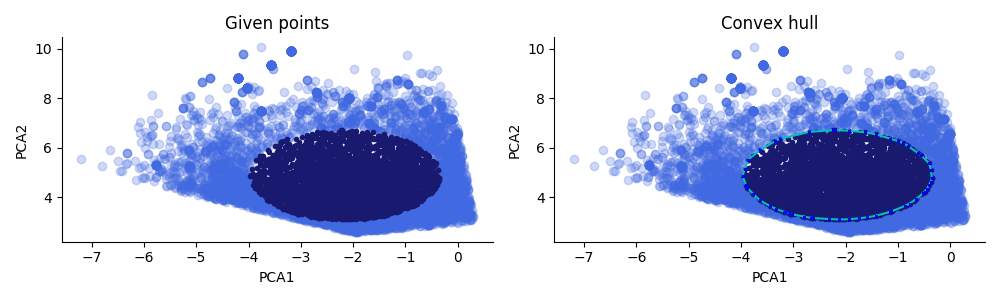

cluster: 4


<IPython.core.display.Javascript object>


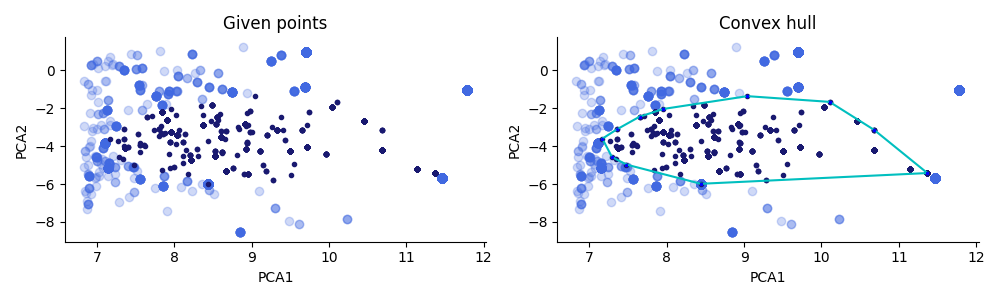

cluster: 5


<IPython.core.display.Javascript object>


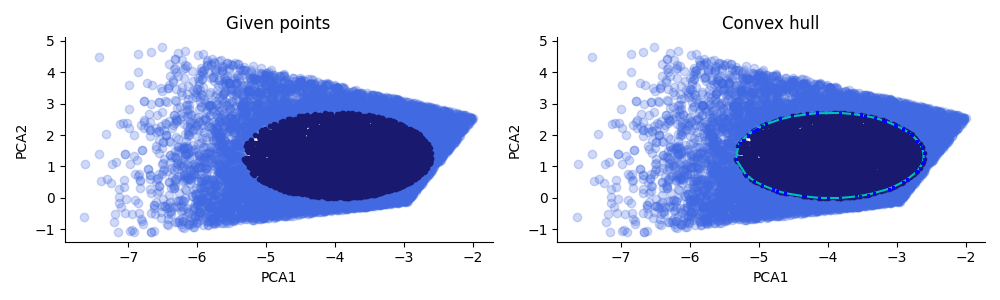

cluster: 6


<IPython.core.display.Javascript object>


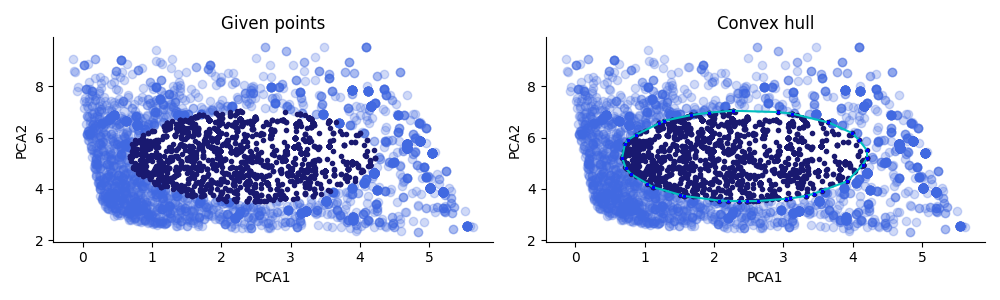

cluster: 7


<IPython.core.display.Javascript object>


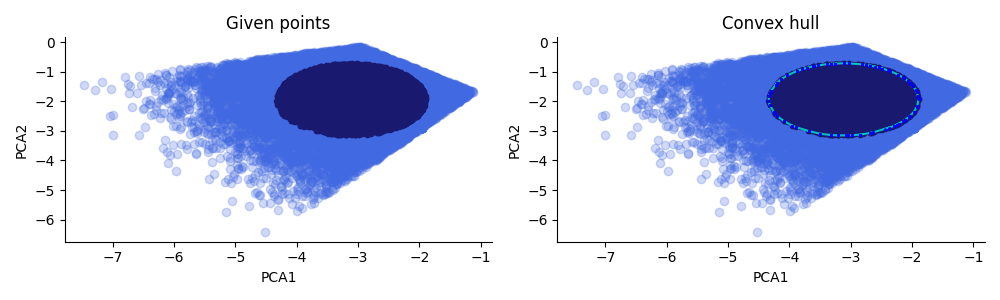

cluster: 8


<IPython.core.display.Javascript object>


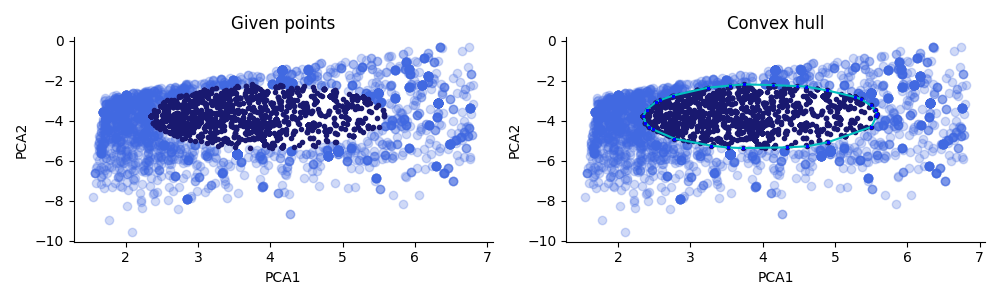

cluster: 9


<IPython.core.display.Javascript object>


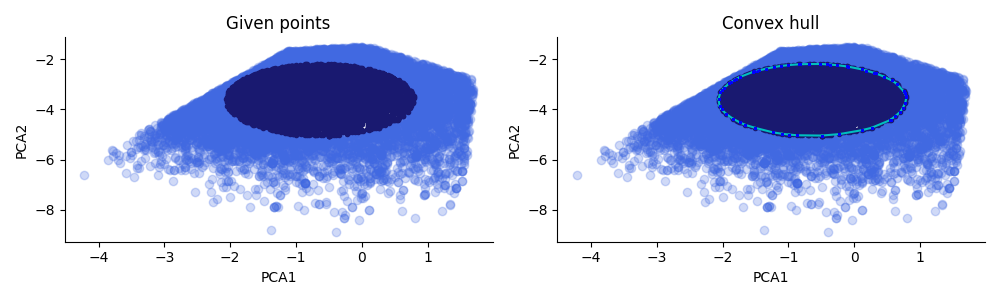

In [106]:
for i in u_labels:
    PlotHull(X, i)

## Standard deviation (in progress for the plot)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

X = pca_df.loc[:,'PCA1':'PCA20']  #select all the PCA

# Number of clusters
num_clusters = 20

# Number of iterations
num_iterations = 10

# List to store standard deviation values for each cluster
cluster_std_deviations = []

# Run clustering process 100 times
for _ in range(num_iterations):
    
   #Initialize the class object
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=25)

    #predict the labels of clusters.
    label = kmeans.fit_predict(X)
    
    # Get cluster labels and cluster centers
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    # Calculate standard deviation for each cluster
    std_deviations = []
    for i in range(num_clusters):
        cluster_points = pca_df.loc[pca_df['Cluster'] == i,['PCA1','PCA2']]
        cluster_points = cluster_points.values
        std_deviation = np.std(cluster_points, axis=0)
        std_deviations.append(std_deviation)
    
    # Append the standard deviation values to the list
    cluster_std_deviations.append(std_deviations)

# Print standard deviation values for each cluster
for i, std_deviations in enumerate(cluster_std_deviations):
        print(f"Cluster {i+1}: {std_deviations}")


# Study of Ross

Here we are looking for the average phrase in the cluster.
Since we already have the clusters, we will extract the data of "Ross", and do the average of the cluster depending on 'Ross' only.

In [ ]:
closest_pt_idx = [] # do a list of the closest pont to the center of each clust (for a plot later)
data = X.values
distances = kmeans.transform(X)
for iclust in range(num_clusters):
    cluster_points = pca_df.loc[pca_df['Cluster'] == iclust]
    cluster_points = cluster_points.loc[cluster_points['Person'].str.contains('Ross')] 
    # Creation of list with the index of the point and the corresponding distance to the center of the cluster
    distance_list=[]
    for j in cluster_points.index:
        distance_temporaire = distances[j,iclust]
        temp = [j,distance_temporaire]
        distance_list.append(temp)
    # Then we sort the list by decreasing order of the distance to the cluster center.     
    sort_list = sorted(distance_list, key=itemgetter(1))
    # Get the actual data points using the indices
    closest_points_index = [l[0] for l in sort_list]
    closest_points = [pca_df.loc[c][0:2] for c in closest_points_index]
    closest_pt_idx.append(closest_points_index[0])
       
    print('closest index of point to cluster center: ', closest_points_index[0])
    print(pca_df['Person'][closest_points_index[0]],':',pca_df['Said'][closest_points_index[0]])

In [ ]:
character =pca_df[pca_df['Person'].str.contains('Ross')]
percentage = character['Cluster'].value_counts(normalize=True) * 100
df3 = percentage.to_frame(name="Percentage")
value = [df3.loc[i].values for i in df3.index]


In [ ]:
character

In [ ]:
# Preparation for the plot
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
value = [df3.loc[i].values for i in range(num_clusters)]
lists= df3.index.values.tolist()

# Plot
colors = sns.color_palette('tab20', 10)
# Initialize layout
for i in range(num_clusters):
    plt.bar(i, df3.loc[i].values,label=text[i], color=colors[i]) # Here is loc and not iloc!!!!


plt.legend(title='Cluster medium sentences',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(np.arange(10))
plt.xlabel("Cluster number")
plt.ylabel("Percentage")
plt.title("Ross cluster percentage and his average sentence")

plt.show()

In [ ]:
pca_df = character
print(pca_df)

# Plotting PCA1 and PCA2

plt.scatter(pca_df['PCA1'], pca_df['PCA2'])

# Finding the index of the furthest words on each axis
max_pca1_index = pca_df['PCA1'].idxmax()
max_pca2_index = pca_df['PCA2'].idxmax()

min_pca1_index = pca_df['PCA1'].idxmin()
min_pca2_index = pca_df['PCA2'].idxmin()

# Getting the corresponding words
max_pca1_word = pca_df['Said'][max_pca1_index]
max_pca2_word = pca_df['Said'][max_pca2_index]

min_pca1_word = pca_df['Said'][min_pca1_index]
min_pca2_word = pca_df['Said'][min_pca2_index]

# Annotating the furthest words on each axis
plt.annotate(max_pca1_word, (pca_df['PCA1'][max_pca1_index], pca_df['PCA2'][max_pca1_index]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(max_pca2_word, (pca_df['PCA1'][max_pca2_index], pca_df['PCA2'][max_pca2_index]), xytext=(10, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca1_word, (pca_df['PCA1'][min_pca1_index], pca_df['PCA2'][min_pca1_index]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca2_word, (pca_df['PCA1'][min_pca2_index], pca_df['PCA2'][min_pca2_index]), xytext=(10, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))




# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA1 vs PCA2')

# Displaying the plot
plt.show()

Now we want to plot for each cluster where is Ross 

In [ ]:
nb_cluster = 1
data = X.values
distances = kmeans.transform(X)
cluster_points = pca_df.loc[pca_df['Cluster'] == nb_cluster]
cluster_cen = kmeans.cluster_centers_[nb_cluster]
# Creation of list with the index of the point and the corresponding distance to the center of the cluster
distance_list=[]
for j in cluster_points.index:
    distance_temporaire = distances[j,nb_cluster]
    temp = [j,distance_temporaire]
    distance_list.append(temp)
# Then we sort the list by increasing order of the distance to the cluster center.     
sort_list = sorted(distance_list, key=itemgetter(1))

# Get the actual data points using the indices
closest_points_index = [l[0] for l in sort_list]
closest_points = [pca_df.loc[c][0:2] for c in closest_points_index]
    
points=np.zeros((len(closest_points),2))
for p in np.arange(len(closest_points)):
    points[p][0]= closest_points[p][0]
    points[p][1]=closest_points[p][1]

pmin = points[0,:]
pmin_index = closest_points_index[0]
pmax = points[len(closest_points)-1,:]
pmax_index = closest_points_index[len(closest_points)-1]

In [ ]:
plt.figure()
plt.scatter(pmin[0],pmin[1])
plt.scatter(pmax[0],pmax[1])
plt.scatter(centroids[1,0],centroids[1,1])

# Annotation
plt.annotate(pca_df['Said'][pmin_index], (pmin[0],pmin[1]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(pca_df['Said'][pmax_index], (pmax[0],pmax[1]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('max and min for custer 1 in the case of the study of Ross')
plt.show()

In [ ]:
%matplotlib notebook

ross =pca_df[pca_df['Person'].str.contains('Ross')]
ross_mean_pca1_index = ross['PCA1'].mean()
ross_mean_pca2_index = ross['PCA2'].mean()

monica =pca_df[pca_df['Person'].str.contains('Monica')]
monica_mean_pca1_index = monica['PCA1'].mean()
monica_mean_pca2_index = monica['PCA2'].mean()

chandler =pca_df[pca_df['Person'].str.contains('Chandler')]
chandler_mean_pca1_index = chandler['PCA1'].mean()
chandler_mean_pca2_index = chandler['PCA2'].mean()

phoebe =pca_df[pca_df['Person'].str.contains('Phoebe')]
phoebe_mean_pca1_index = phoebe['PCA1'].mean()
phoebe_mean_pca2_index = phoebe['PCA2'].mean()

rachel =pca_df[pca_df['Person'].str.contains('Rachel')]
rachel_mean_pca1_index = rachel['PCA1'].mean()
rachel_mean_pca2_index = rachel['PCA2'].mean()

joey =pca_df[pca_df['Person'].str.contains('Joey')]
joey_mean_pca1_index = joey['PCA1'].mean()
joey_mean_pca2_index = joey['PCA2'].mean()

text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))


df2 = X.values

fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text[key]))
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster = {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

ax.legend(title='Cluster number',bbox_to_anchor= (-0.15,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)







# Plotting PCA1 and PCA2



# Mean for PCA1

plt.annotate('Ross', (ross_mean_pca1_index,ross_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Monica', (monica_mean_pca1_index, monica_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Chandler', (chandler_mean_pca1_index, chandler_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Phoebe', (phoebe_mean_pca1_index ,phoebe_mean_pca2_index ), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Rachel', (rachel_mean_pca1_index,rachel_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Joey', (joey_mean_pca1_index, joey_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))




# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA1 vs PCA2')

# Displaying the plot
plt.show()

In [ ]:
import random
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))


df2 = X.values

fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text[key]))
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster = {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

ax.legend(title='Cluster number',bbox_to_anchor= (-0.15,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)

plt.annotate('Ross', (pca_df['PCA1'][ross_min_pca1_index], pca_df['PCA2'][ross_min_pca1_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Monica', (pca_df['PCA1'][monica_min_pca1_index], pca_df['PCA2'][monica_min_pca1_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Chandler', (pca_df['PCA1'][chandler_min_pca1_index], pca_df['PCA2'][chandler_min_pca1_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Phoebe', (pca_df['PCA1'][phoebe_min_pca1_index], pca_df['PCA2'][phoebe_min_pca1_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Rachel', (pca_df['PCA1'][rachel_min_pca1_index], pca_df['PCA2'][rachel_min_pca1_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Joey', (pca_df['PCA1'][joey_min_pca1_index], pca_df['PCA2'][joey_min_pca1_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))




# Min for PCA2
plt.annotate('Ross', (pca_df['PCA1'][ross_min_pca2_index], pca_df['PCA2'][ross_min_pca2_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Monica', (pca_df['PCA1'][monica_min_pca2_index], pca_df['PCA2'][monica_min_pca2_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Chandler', (pca_df['PCA1'][chandler_min_pca2_index], pca_df['PCA2'][chandler_min_pca2_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Phoebe', (pca_df['PCA1'][phoebe_min_pca2_index], pca_df['PCA2'][phoebe_min_pca2_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Rachel', (pca_df['PCA1'][rachel_min_pca2_index], pca_df['PCA2'][rachel_min_pca2_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Joey', (pca_df['PCA1'][joey_min_pca2_index], pca_df['PCA2'][joey_min_pca2_index]), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA1 vs PCA2')

plt.show()


df2= X.values
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])

    closest_pt_idx.append(cluster_pts_indices[min_idx])
    print('')
    print('cluster:', iclust)
    print(pca_df['Person'][cluster_pts_indices[min_idx]],':',pca_df['Said'][cluster_pts_indices[min_idx]])
    print('Random phrases in the cluster:')
    for i in np.arange(10):
        print(pca_df['Said'][cluster_pts_indices[random.randint(cluster_pts_indices[0],len(cluster_pts_indices))]])

In [ ]:
ross['PCA1'].mean()